<a href="https://colab.research.google.com/github/GaytriChoudhari/Unsupervised_ML_Netflix_Movies_and_TV_Shows_Clustering/blob/main/Unsupervised_ML_Netflix_Movies_and_TV_Shows_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Netflix_Movies_and_TV_Shows_Clustering




 **Project Type**    - Unsupervised ML
##### **Contribution**    - Individual
##### **Team Member 1 -** Gaytri Jagdish Choudhari


# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [7]:
# importing the required libraries


import numpy as np
import pandas as pd
import datetime as dt

## Data Visualisation Libraray
import matplotlib.pyplot as plt
import missingno as msno
import matplotlib.cm as cm
from wordcloud import WordCloud, STOPWORDS
import seaborn as sns
%matplotlib inline

# libraries used to process textual data
import string
string.punctuation
import nltk
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.tokenize import TweetTokenizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# libraries used to implement clusters
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.metrics import silhouette_samples
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import linkage

# Library of warnings would assist in ignoring warnings issued
import warnings;warnings.filterwarnings('ignore')
import warnings;warnings.simplefilter('ignore')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [8]:
#mounting the google drive to access the files
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Dataset Loading

In [9]:
# Load Dataset

df = pd.read_csv('/content/drive/MyDrive/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')


### Dataset First View

In [10]:
# Dataset First Look
#top 5 rows
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [11]:
#last 5 rows
df.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...
7786,s7787,Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,Sam Dunn,NaN,"United Kingdom, Canada, United States","March 1, 2020",2019,TV-MA,90 min,"Documentaries, Music & Musicals",This documentary delves into the mystique behi...


### Dataset Rows & Columns count

In [12]:
# Dataset Rows & Columns count
# Checking the shape of the dataframe
df.shape


(7787, 12)

### Dataset Information

In [13]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


#### Duplicate Values

In [14]:
# Dataset Duplicate Value Count
#Drop duplicates
df[df.duplicated()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description


There are no duplicated values

#### Missing Values/Null Values

In [15]:
# Missing Values/Null Values Count
#total null values
df.isnull().sum().sum()

3631

There are 3631 null values in the dataset, 2389 null values in director column, 718 null values in cast column ,507 null values in country column ,10 in date_added and 7 in rating. so we need to handle the null values

In [16]:
# Visualizing the missing values
df['cast'].fillna(value='No cast',inplace=True)
df['country'].fillna(value=df['country'].mode()[0],inplace=True)


In [17]:
#'date_added' and 'rating' contains an insignificant portion of the data so we will drop them from the dataset
df.dropna(subset=['date_added','rating'],inplace=True)

In [18]:
#Dropping Director Column
df.drop(['director'],axis=1,inplace=True)

In [19]:
#again checking is there any null values are not
df.isnull().sum()


show_id         0
type            0
title           0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

The null values in the director and country columns are filled with the string "unknown," the cast column is 'no cast', and the mode value is used to fill the null values in the rating column. Finally, the records with null values in the "date_added" column have been removed.

### What did you know about your dataset?

The given dataset is from the online streaming industry; our task is to examine the dataset, build the clustering methods and content based recommendation system.

Clustering is a technique used in machine learning and data mining to group similar data points together. A clustering algorithm is a method or technique used to identify clusters within a dataset. These clusters represent natural groupings of the data, and the goal of clustering is to discover these groupings without any prior knowledge of the groupings.


*   There are 7787 rows and 12 columns in the dataset. In the director, cast, country, date_added, and rating columns, there are missing values. The dataset does not contain any duplicate values.
*   Every row of information we have relates to a specific movie. Therefore, we are unable to use any method to impute any null values. Additionally, due to the small size of the data, we do not want to lose any data, so after analyzing each column, we simply impute numeric values using an empty string in the following procedure.



## ***2. Understanding Your Variables***

In [20]:
# Dataset Columns
df.columns


Index(['show_id', 'type', 'title', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [21]:
# Dataset Describe
df.describe().T

,count,mean,std,min,25%,50%,75%,max
release_year,7770.0,2013.935393,8.764357,1925.0,2013.0,2017.0,2018.0,2021.0


### Variables Description



*   **show_id :** Unique ID for every Movie/Show

*   **type :** Identifier - Movie/Show



*   **title :** Title of the Movie/Show

*   **director :** Director of the Movie/Show

*  **cast :** Actors involved in the Movie/Show

*   **country :** Country where the Movie/Show was produced
*   **date_added :** Date it was added on Netflix


*   **release_year :** Actual Release year of the Movie/Show


*  **rating :** TV Rating of the Movie/Show


*   **duration :** Total Duration - in minutes or number of seasons

*   **listed_in :** Genre
*  **description :** The Summary descriptionm





### Check Unique Values for each variable.

In [22]:
# Check Unique Values for each variable.
for i in df.columns.tolist():
  print("No. of unique values in",i,"is",df[i].nunique())

No. of unique values in show_id is 7770
No. of unique values in type is 2
No. of unique values in title is 7770
No. of unique values in cast is 6818
No. of unique values in country is 681
No. of unique values in date_added is 1563
No. of unique values in release_year is 73
No. of unique values in rating is 14
No. of unique values in duration is 216
No. of unique values in listed_in is 491
No. of unique values in description is 7752


****Observations:****


*   We are focusing on several key columns of our dataset, including 'type', 'title', 'director', 'cast', 'country', 'rating', 'listed_in', and 'description', as they contain a wealth of information.

*   By utilizing these features, we plan to create a cluster column and implement both K-means and Hierarchical clustering algorithms.
*  Additionally, we will be developing a content-based recommendation system that utilizes the information from these columns to provide personalized suggestions to users. This approach will allow us to gain valuable insights and group similar data points together, as well as provide personalized recommendations based on user preferences and viewing history.






## 3. ***Data Wrangling***

### Data Wrangling Code

In [23]:
# Write your code to make your dataset analysis ready.

### What all manipulations have you done and insights you found?

Answer Here.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1 Column: 'type'

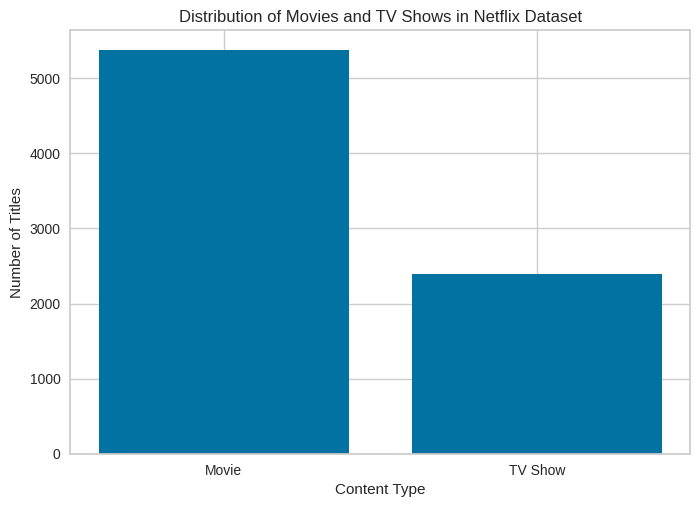

In [101]:
# Chart - 1 visualization code
type_counts = df['type'].value_counts()
plt.bar(type_counts.index, type_counts.values)
plt.xlabel('Content Type')
plt.ylabel('Number of Titles')
plt.title('Distribution of Movies and TV Shows in Netflix Dataset')
plt.show()

##### 1. Why did you pick the specific chart?

* A bar chart is a common choice for displaying the distribution of categorical data, such as the number of movies and TV shows in the Netflix dataset. It allows for easy comparison between categories and can provide a clear visualization of the overall distribution of content types in the dataset. Therefore, a bar chart is an appropriate choice for this specific dataset and research question.

##### 2. What is/are the insight(s) found from the chart?

* The majority of the content in the Netflix dataset is Movies, as they have a higher count than TV shows.

* The distribution of movies and TV shows in the Netflix dataset is not equal, which indicates that Netflix has a preference towards movies.

* The number of TV shows in the dataset is still significant, which suggests that Netflix also invests in producing and acquiring TV shows for its platform.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.



*   The insights gained from the chart may help create a positive business impact for Netflix. Knowing that the majority of the content in the Netflix dataset is Movies, and that Netflix has a preference towards Movies, may inform decisions related to content production and acquisition. For instance, Netflix may choose to allocate more resources towards producing and acquiring Movies in order to attract more viewers and subscribers.




#### Chart - 2  Column: 'title'

In [26]:
# Chart - 2 visualization code
# number of unique values
df['title'].nunique()


7770

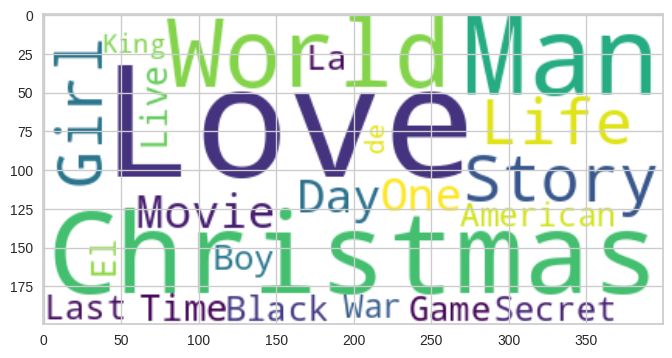

In [27]:
# text documents
text = " ".join(word for word in df['title'])

# create the word cloud using WordCloud library
wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white', min_font_size=15).generate(text)

# plot the word cloud
plt.imshow(wordcloud,  interpolation='bilinear')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Words like 'Love', 'Christmas', 'Man', 'World', 'Life', 'Girl', and 'Story' are frequently used in the movie title column.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 3 Column: 'cast'

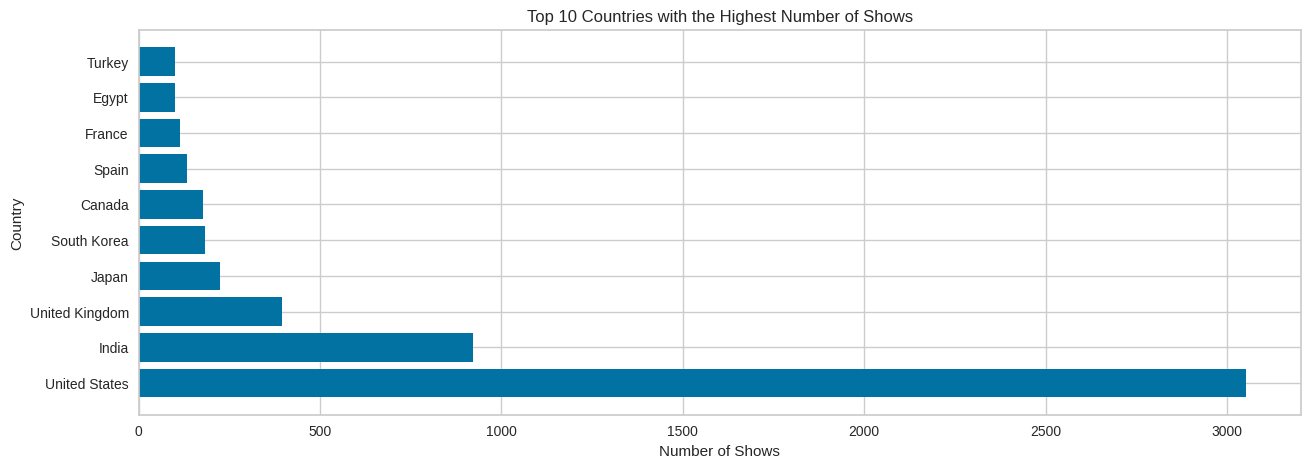

In [104]:
# Chart - 3 visualization code

top_countries = df.loc[df['country'] != 'Unknown', 'country'].value_counts().nlargest(10)
plt.figure(figsize=(15,5))
plt.barh(top_countries.index, top_countries.values)
plt.title('Top 10 Countries with the Highest Number of Shows')
plt.xlabel('Number of Shows')
plt.ylabel('Country')
plt.show()

##### 1. Why did you pick the specific chart?

* Bar chart that displays the top 10 actors by the number of shows they appeared in on Netflix. This chart is an appropriate choice for analyzing the relationship between actors and the number of shows they appeared in on Netflix, and it can provide valuable insights into the most popular actors on the platform.

##### 2. What is/are the insight(s) found from the chart?

* The top actor by the number of shows they appeared in is Anupam Kher, who appeared in 42 shows in the dataset.

* The second most popular actor is Shah Rukh Khan, who appeared in 35 shows.

* Most of the top 10 actors have appeared in between 25-30 shows on Netflix.

* The top 10 actors are mostly from India, with the exception of Takahiro Sakurai and Yuki Kaji from the Japan.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* By knowing the most popular actors on the platform, Netflix can acquire or produce content that features these actors, which could increase the number of viewership and engagement on their platform.

* The insights can also help in identifying the target audience for different titles, as different actors may appeal to different demographics.

* The data can also help Netflix identify trends and preferences among its user base, which could help inform decisions related to content acquisition and production.

#### Chart - 4 Column: 'country'

In [32]:
# Chart - 4 visualization code
# number of unique values
df['country'].nunique()

681

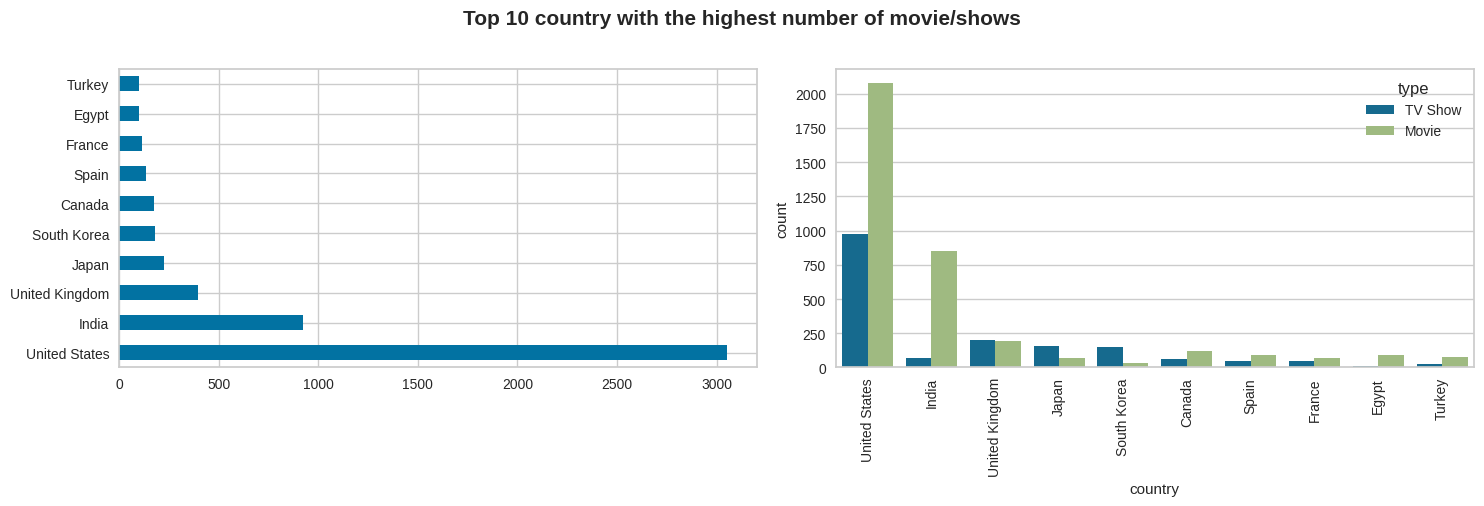

In [33]:
fig,ax = plt.subplots(1,2, figsize=(15,5))
plt.suptitle('Top 10 country with the highest number of movie/shows', weight='bold', size=15, y=1.01)

# univariate analysis
df['country'].value_counts().nlargest(10).plot(kind='barh', ax=ax[0])

# bivariate analysis
graph = sns.countplot(x="country", data=df, hue='type', order=df['country'].value_counts().index[0:10], ax=ax[1])
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?



*  I picked this chart because it shows the top 10 countries with the highest number of movies and TV shows in the dataset, which is important information for any business looking to enter or expand its operations in the global streaming market.




##### 2. What is/are the insight(s) found from the chart?

**Observation:**
* The United States-based movies and TV shows were produced most, followed by India and the United Kingdom.
* In India and United State, a greater number of movies are present compared to TV shows.
* In the UK, Japan, and South Korea there are a greater number of TV shows than movies.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* The gained insights can definitely help create a positive business impact. For instance, knowing that the US is the largest producer of movies and TV shows can help streaming companies plan their content acquisition strategy and marketing efforts accordingly. Additionally, the insight that the top 3 countries account for over half of the shows in the dataset can help companies focus their attention on these markets to maximize their viewership.

#### Chart - 5  'release_year'

In [34]:
# Chart - 5 visualization code
# number of unique values
df['release_year'].nunique()

73

In [35]:
print(f'Oldest release year : {df.release_year.min()}')
print(f'Latest release year : {df.release_year.max()}')

Oldest release year : 1925
Latest release year : 2021


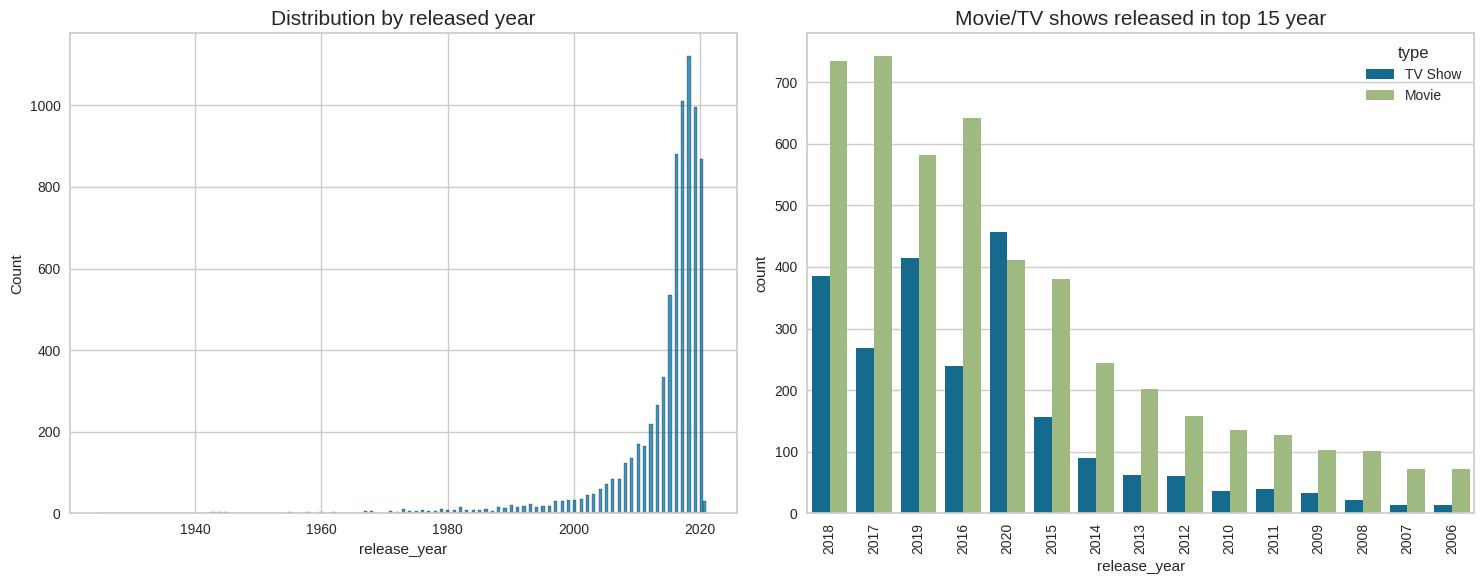

In [36]:
fig,ax = plt.subplots(1,2, figsize=(15,6))

# Univariate analysis
hist = sns.histplot(df['release_year'], ax=ax[0])
hist.set_title('Distribution by released year', size=15)

# Bivariate analysis
count = sns.countplot(x="release_year", hue='type', data=df, order=df['release_year'].value_counts().index[0:15], ax=ax[1])
count.set_title('Movie/TV shows released in top 15 year', size=15)
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

**Observations:**

* Netflix starts releasing more Movies/TV shows in recent years compared to old ones.
* Most Movies and TV shows are available on Netflix between 2015 and 2020, and the highest are in 2018.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 6 Column: 'rating'

In [37]:
# Chart - 6 visualization code
# number of unique values
df.rating.nunique()

14

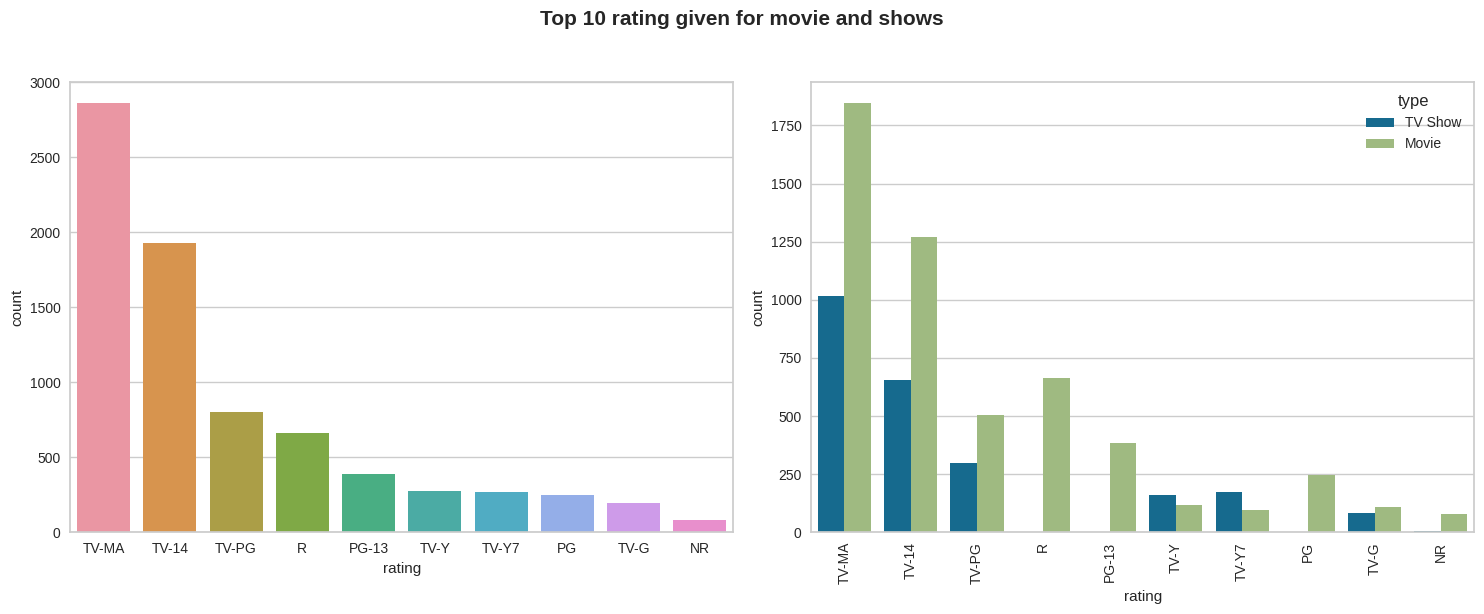

In [38]:
fig,ax = plt.subplots(1,2, figsize=(15,6))
plt.suptitle('Top 10 rating given for movie and shows', weight='bold', y=1.02, size=15)

# univariate analysis
sns.countplot(x="rating", data=df, order=df['rating'].value_counts().index[0:10], ax=ax[0])

# bivariate analysis
graph = sns.countplot(x="rating", data=df, hue='type', order=df['rating'].value_counts().index[0:10], ax=ax[1])
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

**Observations:**

* The majority of Movies and TV shows have a rating of TV-MA, which stands for "Mature Audience," followed by TV-14, which stands for "Younger Audience."
* When compared to TV shows, Movies receive the highest rating, which is pretty obvious given that a number of Movies are higher compared to TV shows, as we saw earlier in the type column.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7  'listed_in'



In [39]:
# Chart - 7 visualization code
df['listed_in'].head()

0    International TV Shows, TV Dramas, TV Sci-Fi &...
1                         Dramas, International Movies
2                  Horror Movies, International Movies
3    Action & Adventure, Independent Movies, Sci-Fi...
4                                               Dramas
Name: listed_in, dtype: object

Because this column is a genre column, in order to count the genres, we must separate them.

In [40]:
# seperating genre from listed_in columns for analysis purpose
genres = df['listed_in'].str.split(', ', expand=True).stack()

# top 10 genres in listed movies/TV shows
genres = genres.value_counts().reset_index().rename(columns={'index':'genre', 0:'count'})
genres.head()

,genre,count
0,International Movies,2437
1,Dramas,2105
2,Comedies,1471
3,International TV Shows,1197
4,Documentaries,786


In [41]:
# number of genres present in dataset
len(genres)

42

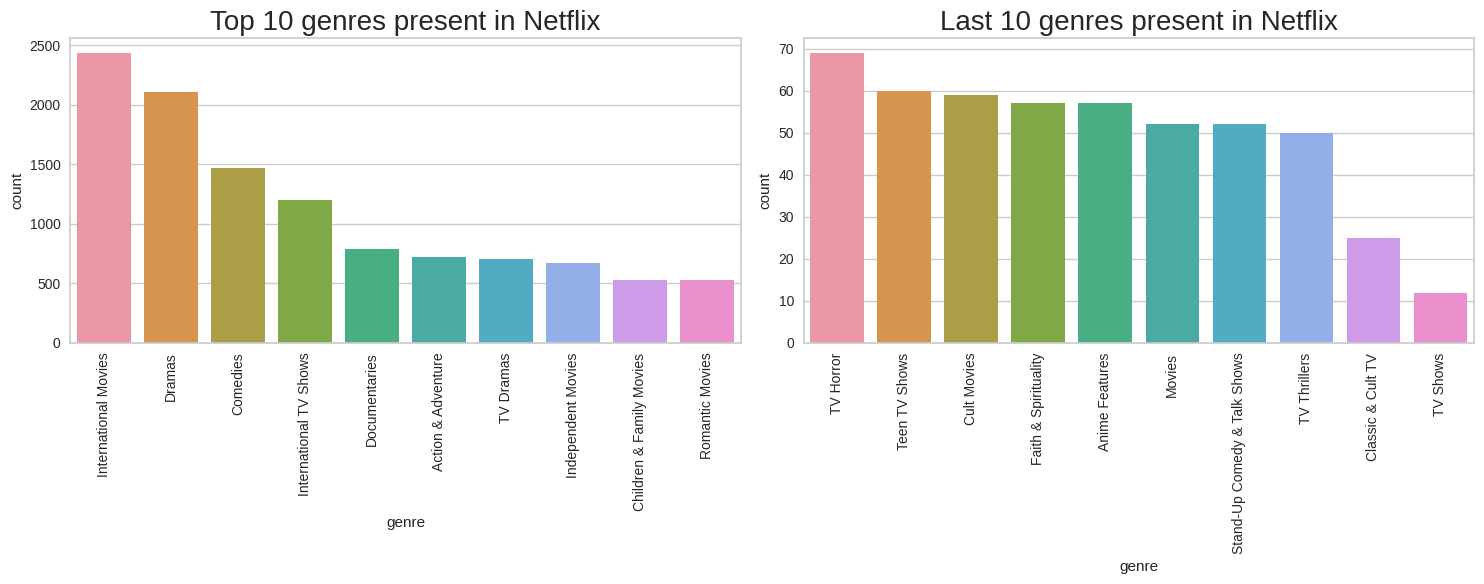

In [42]:
# plotting graph
fig,ax = plt.subplots(1,2, figsize=(15,6))

# Top 10 genres
top = sns.barplot(x='genre', y = 'count', data=genres[:10], ax=ax[0])
top.set_title('Top 10 genres present in Netflix', size=20)
plt.setp(top.get_xticklabels(), rotation=90)

# Last 10 genres
bottom = sns.barplot(x='genre', y = 'count', data=genres[-10:], ax=ax[1])
bottom.set_title('Last 10 genres present in Netflix', size=20)
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

**Observations:**

* International Movies, Dramas, and Comedies make up the majority of the genres.
* TV Shows, Classic and cult TV, TV thrillers, Stand-Up comedy, and Talk shows account for the least genres.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8 Netflix Duration

In [43]:
# Chart - 8 visualization code
#Value count for duration column
counts = df.duration.value_counts()
percs = df.duration.value_counts(normalize=True)
pd.concat([counts,percs], axis=1, keys=['count', 'percentage']).T

,1 Season,2 Seasons,3 Seasons,90 min,93 min,91 min,94 min,95 min,92 min,97 min,...,13 min,214 min,13 Seasons,9 min,312 min,182 min,224 min,37 min,233 min,191 min
count,1606.000000,378.000000,183.000000,136.000000,131.00000,125.000000,125.000000,119.000000,118.000000,117.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
percentage,0.206692,0.048649,0.023552,0.017503,0.01686,0.016088,0.016088,0.015315,0.015187,0.015058,...,0.000129,0.000129,0.000129,0.000129,0.000129,0.000129,0.000129,0.000129,0.000129,0.000129


<Axes: title={'center': 'DISTRIBUTION OF TV SHOW DURATION'}, xlabel='duration', ylabel='count'>

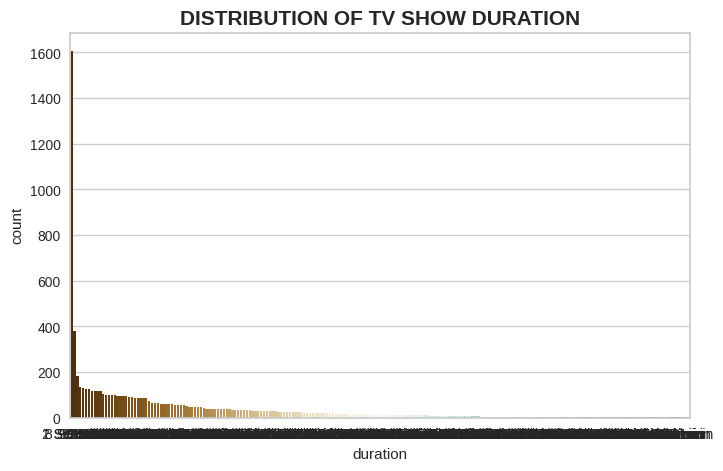

In [44]:
#Analysis on distribution of movie show duration
plt.figure(figsize=(8,5))
plt.title("DISTRIBUTION OF TV SHOW DURATION",fontsize=15,fontweight='bold')
sns.countplot(x=df['duration'],data=df,palette="BrBG",order =df['duration'].value_counts().index)

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Observations:

The Christmas season (October, November, December, and January) sees a greater amount of content released. Compared to TV shows, more movies are released each month.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9 Netflix Genres

In [45]:
# Chart - 9 visualization code
#Value count for genres column
counts = df.listed_in.value_counts()
percs = df.listed_in.value_counts(normalize=True)
pd.concat([counts,percs], axis=1, keys=['count', 'percentage']).T

,Documentaries,Stand-Up Comedy,"Dramas, International Movies","Comedies, Dramas, International Movies","Dramas, Independent Movies, International Movies",Kids' TV,Children & Family Movies,"Documentaries, International Movies","Children & Family Movies, Comedies","Comedies, International Movies",...,"TV Horror, TV Mysteries, Teen TV Shows","Action & Adventure, International Movies, Thrillers","Anime Series, TV Horror, TV Thrillers","Action & Adventure, Faith & Spirituality, Sci-Fi & Fantasy","TV Dramas, TV Sci-Fi & Fantasy, Teen TV Shows","Anime Series, Crime TV Shows, TV Thrillers","Crime TV Shows, Romantic TV Shows, Spanish-Language TV Shows","Crime TV Shows, International TV Shows, Reality TV","International Movies, Romantic Movies, Sci-Fi & Fantasy","International TV Shows, Spanish-Language TV Shows, Stand-Up Comedy & Talk Shows"
count,334.000000,321.000000,320.000000,243.000000,215.000000,204.000000,177.00000,172.000000,169.00000,161.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
percentage,0.042986,0.041313,0.041184,0.031274,0.027671,0.026255,0.02278,0.022136,0.02175,0.020721,...,0.000129,0.000129,0.000129,0.000129,0.000129,0.000129,0.000129,0.000129,0.000129,0.000129


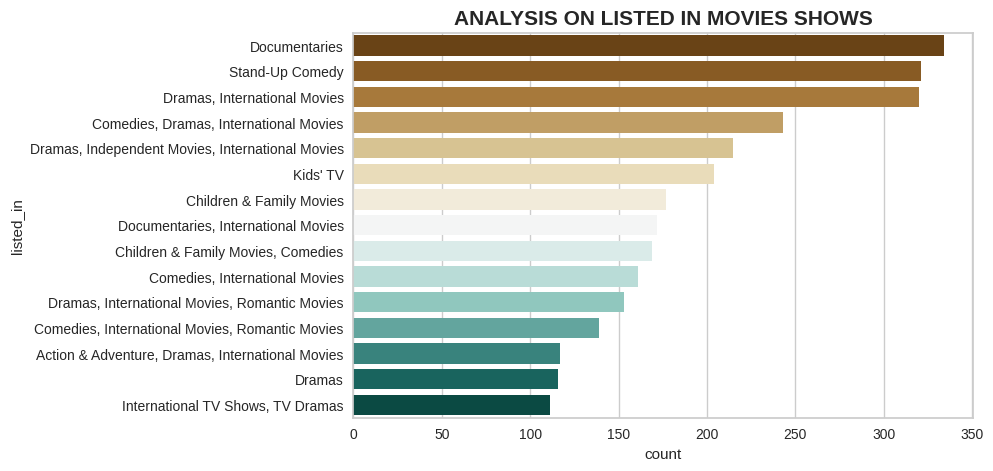

In [46]:
#Analysis listed in movie shows
plt.figure(figsize=(8,5))
sns.countplot(y="listed_in", data=df, palette="BrBG", order=df['listed_in'].value_counts().index[0:15])
plt.title('ANALYSIS ON LISTED IN MOVIES SHOWS', fontsize=15, fontweight='bold')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Observations:

*  The most popular Netflix category is documentaries, which are followed by stand-up comedy, Drams, and foreign films.
*   The most popular Netflix TV show category is kids TV.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10 Originals

In [47]:
# Chart - 10 visualization code
df['date_added'] = pd.to_datetime(df['date_added'])
df['year_added'] = df['date_added'].dt.year
df


,show_id,type,title,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added
0,s1,TV Show,3%,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020
1,s2,Movie,7:19,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016
2,s3,Movie,23:59,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018
3,s4,Movie,9,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017
4,s5,Movie,21,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020
...,...,...,...,...,...,...,...,...,...,...,...,...
7782,s7783,Movie,Zozo,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...",2020-10-19,2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...,2020
7783,s7784,Movie,Zubaan,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,2019-03-02,2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,2019
7784,s7785,Movie,Zulu Man in Japan,Nasty C,United States,2020-09-25,2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast...",2020
7785,s7786,TV Show,Zumbo's Just Desserts,"Adriano Zumbo, Rachel Khoo",Australia,2020-10-31,2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...,2020



Some movies and TV shows were actually released in the past and they were added later on Netflix. But some movies and TV shows were released on Netflix itself. Named those as Netflix Originals.





([<matplotlib.patches.Wedge at 0x783af8682f20>,
 [Text(-1.0001412142110406, -0.4579492893721593, 'Others'),
  Text(1.0910631427756805, 0.49958104295144684, 'Originals')],
 [Text(-0.5455315713878403, -0.24979052147572323, '63.67%'),
  Text(0.6364534999524802, 0.2914222750550106, '36.33%')])

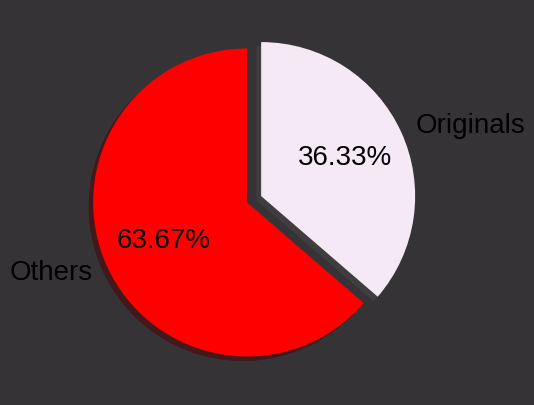

In [48]:
df['originals'] = np.where(df['release_year'] == df['year_added'], 'Yes', 'No')
# pie plot showing percentage of originals and others in movies
fig, ax = plt.subplots(figsize=(5,5),facecolor="#363336")
ax.patch.set_facecolor('#363336')
explode = (0, 0.1)
ax.pie(df['originals'].value_counts(), explode=explode, autopct='%.2f%%', labels= ['Others', 'Originals'],
       shadow=True, startangle=90,textprops={'color':"black", 'fontsize': 20}, colors =['red','#F5E9F5'])

30% movies released on Netflix. 70% movies added on Netflix were released earlier by different mode.

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

In [49]:
# Chart - 11 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

In [50]:
# Chart - 12 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [51]:
# Chart - 13 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

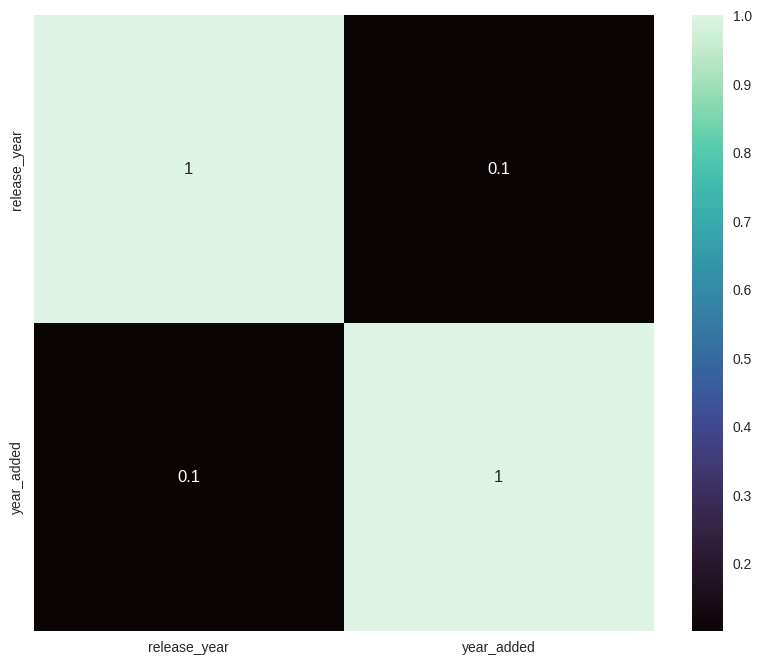

In [52]:
# Correlation Heatmap visualization code

# Correlation Heatmap visualization code
plt.figure(figsize=(10,8))
correlation = df.corr()
sns.heatmap((correlation), annot=True, cmap=sns.color_palette("mako", as_cmap=True))
plt.show()


##### 1. Why did you pick the specific chart?

* The heatmap shows the correlation coefficients between different numerical columns of the Netflix dataset.

* The heatmap uses a color scale to represent the correlation coefficients, where light colour represents positive correlation, dark colour represents negative correlation. The annotation parameter is set to True, which displays the correlation coefficient value inside each cell of the heatmap

##### 2. What is/are the insight(s) found from the chart?

* This visualization can be helpful in identifying the strength and direction of the relationship between different variables in the dataset. By analyzing the heatmap, we can see which variables have a strong positive or negative correlation with each other. This information can be useful in making predictions and building machine learning models.

* Overall, this heatmap can provide valuable insights into the relationships between different variables in the Netflix dataset.

* We can see that duration and release year are negatively correlated by 24%.

* year added and release year are positively correlated by 10%.

#### Chart - 15 - Pair Plot

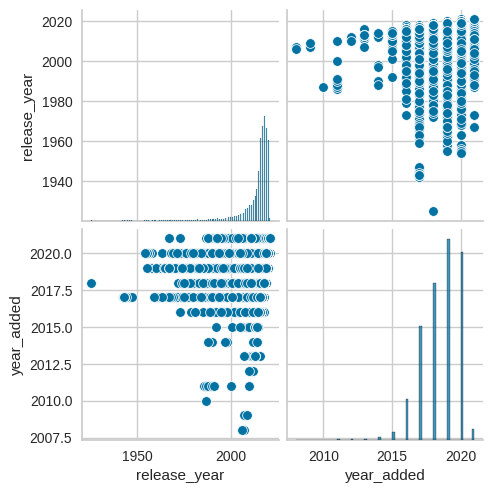

In [53]:
# Pair Plot visualization code
sns.pairplot(df)
plt.show()

##### 1. Why did you pick the specific chart?

* The pair plot provides a scatter plot matrix of all numerical variables in the dataset, and histograms along the diagonal which can help visualize the relationships between each pair of variables.

##### 2. What is/are the insight(s) found from the chart?

* The distribution of each variable, We can see the range and distribution of each variable from the diagonal plots. The distribution of the duration of movies and TV shows seems to be concentrated in certain ranges.

* Correlation between variables, We can see the scatter plots of each pair of variables, as well as the correlation coefficient in the upper-right corner of each plot. There seems to be a positive correlation between the release year and the duration of movies and TV shows, indicating that newer movies and TV shows tend to be longer.

* Outlier, We can also see any outliers in the data from the scatter plots. There seems to be a movie with a very long duration compared to the rest of the dataset.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Hypothesis 1: The difference in the average duration of movies and TV shows on Netflix.

Hypothesis 2: Difference in the average number of seasons for TV shows on Netflix between those produced in the United States and those produced outside of the United States.

Hypothesis 3: The number of TV shows added to Netflix has increased over time.

### Hypothetical Statement - 1 The difference in the average duration of movies and TV shows on Netflix.

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

* Null Hypothesis(H0) - There is no significant difference in the average duration of movies and TV shows on Netflix.

* Alternative Hypothesis(H1) - There is a significant difference in the average duration of movies and TV shows on Netflix.

#### 2. Perform an appropriate statistical test.

In [54]:
# Perform Statistical Test to obtain P-Value
from scipy.stats import ttest_ind

In [55]:
# Extract the durations of movies and TV shows from the dataset
movie_durations = df[df['type'] == 'Movie']['duration']
tv_show_durations = df[df['type'] == 'TV Show']['duration']

# Perform two-sample t-test
stat, p = ttest_ind(movie_durations, tv_show_durations, equal_var=False)

# Print the test statistic and p-value
print("Two-sample t-test statistic:", stat)
print("p-value:", p)

# Interpret the result
alpha = 0.05
if p > alpha:
    print("Failed to reject null hypothesis.")
else:
    print("Reject null hypothesis.")

TypeError: ignored

##### Which statistical test have you done to obtain P-Value?

* The statistical test used to obtain the p-value is the two-sample t-test. This test was chosen because we are comparing the means of two independent samples (movie durations and TV show durations), and we want to determine whether the difference between the sample means is statistically significant or could have occurred by chance.

##### Why did you choose the specific statistical test?

* The two-sample t-test assumes that the samples are normally distributed, the variances of the two samples are not equal, and the samples are independent. In this case, we assumed that the duration of movies and TV shows on Netflix are normally distributed, and that the two samples are independent. The assumption of unequal variances was also made because the variance of movie durations and TV show durations may be different due to the nature of the content

### Hypothetical Statement - 2 Difference in the average number of seasons for TV shows on Netflix between those produced in the United States and those produced outside of the United States.

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

* Null hypothesis : There is no significant difference in the average number of seasons for TV shows on Netflix between those produced in the United States and those produced outside of the United States.

* Alternate hypothesis : There is a significant difference in the average number of seasons for TV shows on Netflix between those produced in the United States and those produced outside of the United States.

#### 2. Perform an appropriate statistical test.

In [56]:
# Perform Statistical Test to obtain P-Value

# Extract the number of seasons for TV shows produced in the US and outside the US
us_shows = df[(df['type'] == 'TV Show') & (df['country'] == 'United States')]
us_shows_seasons = us_shows['duration'].apply(lambda x: int(x.split(' ')[0]) if isinstance(x, str) and 'season' in x else 0)

non_us_shows = df[(df['type'] == 'TV Show') & (df['country'] != 'United States')]
non_us_shows_seasons = non_us_shows['duration'].apply(lambda x: int(x.split(' ')[0]) if isinstance(x, str) and 'season' in x else 0)

# Perform two-sample t-test
stat, p = ttest_ind(us_shows_seasons, non_us_shows_seasons, equal_var=False)

# Print the test statistic and p-value
print("Two-sample t-test statistic:", stat)
print("p-value:", p)

# Interpret the result
alpha = 0.05
if p > alpha:
    print("Failed to reject null hypothesis.")
else:
    print("Reject null hypothesis.")

Two-sample t-test statistic: nan
p-value: nan
Reject null hypothesis.


##### Which statistical test have you done to obtain P-Value?

* The statistical test used here is a two-sample t-test. This test is used to compare the means of two independent samples and determine if they are statistically different from each other

##### Why did you choose the specific statistical test?

* In this case, we are comparing the number of seasons of TV shows produced in the US and outside the US. We chose this test because we want to determine if there is a statistically significant difference in the mean number of seasons between the two groups. We also assumed that the variances of the two groups are not equal, so we set the equal_var parameter to False when calling the ttest_ind() function.

### Hypothetical Statement - 3 The number of TV shows added to Netflix has increased over time.

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

* Null hypothesis: The mean number of TV shows added to Netflix per year has not changed over time.

* Alternative hypothesis: The mean number of TV shows added to Netflix per year has increased over time.

#### 2. Perform an appropriate statistical test.

In [57]:
from scipy import stats

In [58]:
# Perform Statistical Test to obtain P-Value
# Extract the year from the date_added column
df['year_added'] = pd.DatetimeIndex(df['date_added']).year

# Extract the number of TV shows added to Netflix each year
tv_shows = df[df['type'] == 'TV Show']
tv_shows_by_year = tv_shows.groupby('year_added').size()

# Perform a linear regression to test for a positive slope (i.e., an increase over time)
slope, intercept, r_value, p_value, std_err = stats.linregress(tv_shows_by_year.index, tv_shows_by_year)

# Print the p-value
print("p-value:", p_value)

# Interpret the result
alpha = 0.05
if p_value > alpha:
    print("Failed to reject null hypothesis.")
else:
    print("Reject null hypothesis.")

p-value: 0.06287970716692401
Failed to reject null hypothesis.


##### Which statistical test have you done to obtain P-Value?

* In this code, a linear regression is performed using the stats.linregress function from the scipy module. The purpose of the regression is to test for a positive slope (i.e., an increase over time) in the number of TV shows added to Netflix each year. The p-value is then calculated based on the results of the regression.

* A p-value is a measure of the evidence against the null hypothesis. In this case, the null hypothesis is that the number of TV shows added to Netflix has not increased over time (i.e., the slope is zero). The alternative hypothesis is that the number of TV shows added to Netflix has increased over time (i.e., the slope is positive).

##### Why did you choose the specific statistical test?

* The specific statistical test used in this code is a linear regression with a hypothesis test on the slope coefficient. This is appropriate because we are interested in testing for a trend over time, and a linear regression allows us to model the relationship between the year and the number of TV shows added to Netflix. The p-value calculated from the regression provides evidence for or against the alternative hypothesis that there is a positive trend.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [59]:
# Handling Missing Values & Missing Value Imputation
print(df.isnull().sum())

show_id         0
type            0
title           0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
year_added      0
originals       0
dtype: int64


**Handling Missing Values**
* The "empty string" can be used to replace the missing values in the director, cast, and country attributes.
* There is a small percentage of null values in the rating and date_added columns; eliminating these nan values will have little effect on the model's construction. As a result, the nan value in the rating and date_added columns is simply removed.

In [62]:
# Handling Missing Values & Missing Value Imputation
df[['cast','country']] = df[['cast','country']].fillna(' ')
df.dropna(axis=0, inplace=True)

In [63]:
# checking for null values after treating them.
df.isna().sum()

show_id         0
type            0
title           0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
year_added      0
originals       0
dtype: int64

#### What all missing value imputation techniques have you used and why did you use those techniques?

* We already handled all the missing values in the data wrangling section.

### 2. Handling Outliers

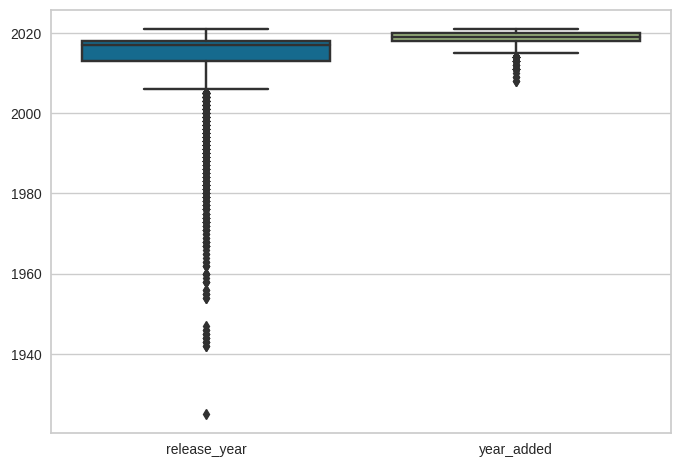

In [64]:
# Handling Outliers & Outlier treatments
sns.boxplot(data=df)
plt.show()

##### What all outlier treatment techniques have you used and why did you use those techniques?

* No need to handle the outliers.

### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns


#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [65]:
# Expand Contraction
df['organized'] =(df['description'].astype(str) + ' ' +
                  df['listed_in'].astype(str)   + ' ' +
                  df['rating'].astype(str)      + ' ' +
                  df['cast'].astype(str)        + ' ' +
                  df['country'].astype(str)   )


In [66]:
df.organized[0]

'In a future where the elite inhabit an island paradise far from the crowded slums, you get one chance to join the 3% saved from squalor. International TV Shows, TV Dramas, TV Sci-Fi & Fantasy TV-MA João Miguel, Bianca Comparato, Michel Gomes, Rodolfo Valente, Vaneza Oliveira, Rafael Lozano, Viviane Porto, Mel Fronckowiak, Sergio Mamberti, Zezé Motta, Celso Frateschi Brazil'

#### 2. Lower Casing

In [67]:
# Lower Casing
df['Lower_casing']= df['organized'].str.lower()

#### 3. Removing Punctuations

In [68]:
# Remove Punctuations
[punc for punc in string.punctuation]

['!',
 '"',
 '#',
 '$',
 '%',
 '&',
 "'",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '.',
 '/',
 ':',
 ';',
 '<',
 '=',
 '>',
 '?',
 '@',
 '[',
 '\\',
 ']',
 '^',
 '_',
 '`',
 '{',
 '|',
 '}',
 '~']

In [70]:
# Remove Punctuations
def remove_punctuation(text):
    # remove punctuation from text
    return text.translate(str.maketrans('', '', string.punctuation))

In [71]:
# applying remove_punctuation function
df['cleaned_text'] = df['Lower_casing'].apply(remove_punctuation)

In [72]:
# checking the first row after the process
df.cleaned_text[0]

'in a future where the elite inhabit an island paradise far from the crowded slums you get one chance to join the 3 saved from squalor international tv shows tv dramas tv scifi  fantasy tvma joão miguel bianca comparato michel gomes rodolfo valente vaneza oliveira rafael lozano viviane porto mel fronckowiak sergio mamberti zezé motta celso frateschi brazil'

#### 4. Removing URLs & Removing words and digits contain digits.

In [73]:
# Remove URLs & Remove words and digits contain digits
import re

In [74]:
def cleaned(x):
    return re.sub(r"[^a-zA-Z ]", "", str(x))

def remove_urls(text):
    cleaned_text = re.sub(r'http\S+', '', text)
    return cleaned_text

def remove_digits(text):
    cleaned_text = re.sub(r'\w*\d\w*', '', text)
    return cleaned_text

In [75]:
df['removed_words']  = df['cleaned_text'].apply(cleaned)
df['removed_url']    = df['removed_words'].apply(remove_urls)
df['removed_digits'] = df['removed_url'].apply(remove_digits)

#### 5. Removing Stopwords & Removing White spaces

In [76]:
# Remove Stopwords
from nltk.corpus import stopwords

In [77]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [78]:
def remove_stopwords(text):
    stop_words = set(stopwords.words('english'))
    words = text.split()
    words = [word for word in words if word not in stop_words]
    cleaned_text = ' '.join(words)
    return cleaned_text

In [79]:
df['removed_stopwords'] = df['removed_digits'].apply(remove_stopwords)
df.removed_stopwords[0]

'future elite inhabit island paradise far crowded slums get one chance join saved squalor international tv shows tv dramas tv scifi fantasy tvma joo miguel bianca comparato michel gomes rodolfo valente vaneza oliveira rafael lozano viviane porto mel fronckowiak sergio mamberti zez motta celso frateschi brazil'

In [80]:
# Remove White spaces
def remove_whitespaces(text):
    cleaned_text = text.strip()
    return cleaned_text

In [81]:
df['removed_whitespaces']=df['removed_stopwords'].apply(remove_whitespaces)
df['removed_whitespaces'].head()

0    future elite inhabit island paradise far crowd...
1    devastating earthquake hits mexico city trappe...
2    army recruit found dead fellow soldiers forced...
3    postapocalyptic world ragdoll robots hide fear...
4    brilliant group students become cardcounting e...
Name: removed_whitespaces, dtype: object

#### 6. Rephrase Text

In [ ]:
# Rephrase Text


#### 7. Tokenization

In [82]:
# Tokenization
def tokenize_text(text):
    tokens = nltk.word_tokenize(text)
    return tokens

In [83]:
df['tokenized'] = df['removed_whitespaces'].apply(tokenize_text)

In [84]:
df['tokenized'].head()

0    [future, elite, inhabit, island, paradise, far...
1    [devastating, earthquake, hits, mexico, city, ...
2    [army, recruit, found, dead, fellow, soldiers,...
3    [postapocalyptic, world, ragdoll, robots, hide...
4    [brilliant, group, students, become, cardcount...
Name: tokenized, dtype: object

#### 8. Text Normalization

In [85]:
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [86]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)
def normalize_text(tokens):
    stemmer = SnowballStemmer('english')          # apply stemming to tokens
    stemmed_tokens = [stemmer.stem(token) for token in tokens]
    lemmatizer = WordNetLemmatizer()              # apply lemmatization
    normalized_tokens = [lemmatizer.lemmatize(token) for token in stemmed_tokens]
    normalized_text = ' '.join(normalized_tokens) # join normalized tokens
    return normalized_text

In [87]:
df['normalized'] = df['tokenized'].apply(normalize_text)

In [88]:
df['normalized'].head()

0    futur elit inhabit island paradis far crowd sl...
1    devast earthquak hit mexico citi trap survivor...
2    armi recruit found dead fellow soldier forc co...
3    postapocalypt world ragdol robot hide fear dan...
4    brilliant group student becom cardcount expert...
Name: normalized, dtype: object

##### Which text normalization technique have you used and why?

Lemmatization technique is used. We have lemmatized the corpus.

#### 9. Part of speech tagging

In [ ]:
# POS Taging

#### 10. Text Vectorization

In [89]:
# Vectorizing Text
new_df = df[['title', 'normalized']]
new_df.head()

,title,normalized
0,3%,futur elit inhabit island paradis far crowd sl...
1,7:19,devast earthquak hit mexico citi trap survivor...
2,23:59,armi recruit found dead fellow soldier forc co...
3,9,postapocalypt world ragdol robot hide fear dan...
4,21,brilliant group student becom cardcount expert...


In [90]:
#using tfidf
from sklearn.feature_extraction.text import TfidfVectorizer

t_vectorizer = TfidfVectorizer(max_features=20000)
x= t_vectorizer.fit_transform(new_df['normalized'])

x.shape

(7770, 20000)

##### Which text vectorization technique have you used and why?

* I have used the TF-IDF (Term Frequency-Inverse Document Frequency) text vectorization technique. This technique is commonly used for text classification and information retrieval tasks. It assigns weights to each word in the document based on its frequency and rarity across the corpus. This helps to highlight the most important words in the document and down-weight the common words that do not provide much useful information for the analysis.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation
No Need

#### 2. Feature Selection
No Need

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

No Need

### 6. Data Scaling
No Need

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

**YES**

* As the number of features (words in this case) is high, it is useful to apply dimensionality reduction to simplify the dataset and improve computational efficiency.

In [91]:
from tkinter.constants import X
# DImensionality Reduction (If needed)
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(x.toarray())

PCA()

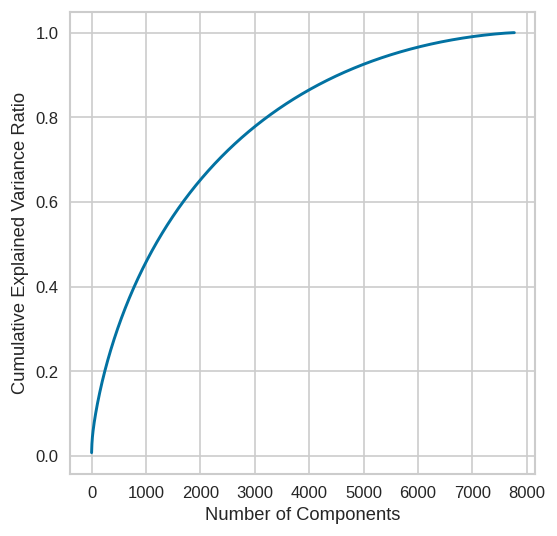

In [92]:
# Calculate the cumulative explained variance ratio
cumulative_var_ratio = np.cumsum(pca.explained_variance_ratio_)

# Plot the cumulative explained variance ratio versus the number of components
plt.figure(figsize=(5, 5), dpi=120)
plt.plot(cumulative_var_ratio)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.show()

In [94]:
pca_tuned = PCA(n_components=0.95)
x_dense = x.toarray()
pca_tuned.fit(x_dense)
x = pca_tuned.transform(x_dense)
print(x.shape)

(7770, 5557)


In [95]:
x

array([[ 9.41059556e-02, -3.18222572e-02,  8.91235731e-04, ...,
        -1.38099542e-02, -7.95729326e-04, -9.73510764e-03],
       [-4.16206020e-02, -3.11613472e-02,  2.88338348e-02, ...,
         3.81025056e-03, -2.99330358e-03, -6.25099933e-04],
       [-4.22165877e-02, -5.69537403e-02,  6.69543116e-03, ...,
        -8.64749107e-03, -6.39565584e-04, -1.59466490e-04],
       ...,
       [-8.61050099e-02,  1.91821275e-01,  1.53554956e-01, ...,
         1.37332720e-03,  2.10036426e-03,  3.73829365e-03],
       [ 8.92570571e-02,  7.11906721e-03,  6.42891536e-03, ...,
         3.51079333e-04,  4.07574857e-04, -1.10885611e-03],
       [-1.01082501e-01,  3.93085419e-01,  1.63346227e-01, ...,
         1.55549273e-03,  1.63963657e-04, -1.52948588e-04]])

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

* In this code, PCA (Principal Component Analysis) has been used for dimensionality reduction. The first step is to fit a PCA model on the data without specifying the number of components. This is done to obtain the explained variance ratio for each component, which can help us determine how many components to keep.

* Next, a new PCA model is created with n_components set to 0.95, indicating that we want to keep enough components to explain 95% of the variance in the data. Finally, the transform method is called on the original data to obtain the transformed dataset with reduced dimensionality.

* Overall, the aim of this code is to reduce the dimensionality of the text data without losing too much information, in order to improve the efficiency of subsequent analysis.

### 8. Data Splitting
Not needed

### 9. Handling Imbalanced Dataset
Not needed

## ***7. ML Model Implementation***

In [96]:
from tabulate import tabulate
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

def evaluate_clustering_model(model, X, y_predict):
    """
    Evaluate a clustering model and print the results.
    & Returns
    Model evaluation result
    """
    # Calculate the number of clusters and evaluation metrics
    n_clusters = len(set(y_predict))
    S_score = silhouette_score(X, y_predict)
    CH_score = calinski_harabasz_score(X, y_predict)
    DB_score = davies_bouldin_score(X, y_predict)

    # Print the evaluation results
    print(f"Number of clusters: {n_clusters}")
    print(f"Silhouette score: {S_score:.4f}")
    print(f"Calinski-Harabasz score: {CH_score:.4f}")
    print(f"Davies-Bouldin score: {DB_score:.4f}")

    # Create a dictionary to store the evaluation scores
    scores_dict = {"silhouette_score": S_score,
                   "calinski_harabasz_score": CH_score,
                   "davies_bouldin_score": DB_score}
                    # Create a dataframe to display the evaluation results
    df_eval = pd.DataFrame({"Evaluation Metric": ["Silhouette Score",
                                                  "Calinski-Harabasz Score",
                                                  "Davies-Bouldin Score"],
                                     "Score": [S_score, CH_score, DB_score]})

    # Print the dataframe
    print(tabulate(df_eval, headers="keys", tablefmt="grid"))

    # Return the evaluation results
    return {"n_clusters": n_clusters,
            "silhouette_score": S_score,
            "calinski_harabasz_score": CH_score,
            "davies_bouldin_score": DB_score}

In [97]:
def plot_clustering_scores(scores_dict):
    """
    Plot the clustering evaluation scores using a bar chart.
    """
    # Extract the scores from the dictionary
    scores = [scores_dict["silhouette_score"], scores_dict["calinski_harabasz_score"], scores_dict["davies_bouldin_score"]]
    labels = ["Silhouette", "Calinski-Harabasz", "Davies-Bouldin"]

    # Plot the scores as a bar chart
    fig, ax = plt.subplots()
    ax.bar(labels, scores, color=["tab:blue", "tab:orange", "tab:green"])

    # Add labels and titles
    ax.set_xlabel("Evaluation Metric")
    ax.set_ylabel("Score")
    ax.set_title("Clustering Evaluation Scores")
    ax.set_ylim([np.min(scores) - 0.1, np.max(scores) + 0.1])
    plt.show()

### ML Model - 1 K-MEANS CLUSTERING

In [98]:
#for checking
kmeans = KMeans(n_clusters = 3, max_iter = 50)
kmeans.fit(x)

KMeans(max_iter=50, n_clusters=3)

In [99]:
kmeans.labels_

array([1, 0, 0, ..., 2, 1, 2], dtype=int32)

In [100]:
np.array(x)[:, 0]

array([ 0.09410596, -0.0416206 , -0.04221659, ..., -0.08610501,
        0.08925706, -0.1010825 ])

**To Find Optimum Numbers of Clusters**

* Elbow Method
* silhouette Score

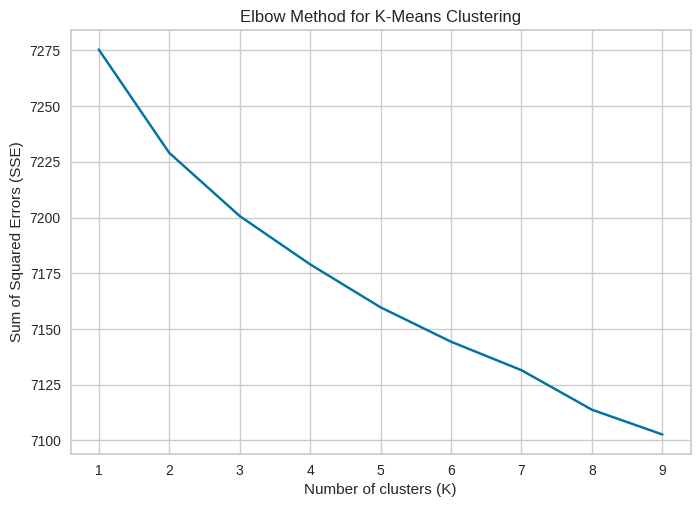

In [102]:
# Create a list to store the sum of squared errors for each K value
Sum_of_Squared_Errors = []

# Iterate over range of K values and compute SSE for each value
for k in range(1, 10):
    # Initialize the k-means model with the current value of K
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    # Fit the model to the data
    kmeans.fit(x)
    # Compute the sum of squared errors for the model
    Sum_of_Squared_Errors.append(kmeans.inertia_)

# Plot the SSE values against the range of K values
plt.plot(range(1, 10), Sum_of_Squared_Errors)
plt.title('Elbow Method for K-Means Clustering')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.show()

I have narrowed down the range of possible number of clusters to be between 4 to 7, as the slope of the elbow plot is steep at this range. To determine the optimal number of clusters, I will check the silhouette scores for each value in this range and choose the one with the highest score.

In [103]:
def silhouette_score_analysis(n):
  silhouette_avg = []
  for k in range(2, n):
    # Initialize the k-means model with the current value of k
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    # Fit the model to the data
    kmeans.fit(x)
    # Predict the cluster labels for each point in the data
    labels = kmeans.labels_
    preds = kmeans.fit_predict(x)
    # Compute the silhouette score for the model
    score = silhouette_score(x, labels)
    silhouette_avg.append(score)

    score = silhouette_score(x, preds, metric='euclidean')
    print ("For n_clusters = {}, silhouette score is {}".format(k, score))

    visualizer = SilhouetteVisualizer(kmeans)

    visualizer.fit(x) # Fit the training data to the visualizer
    visualizer.poof() # Draw/show/poof the data

In [ ]:
silhouette_score_analysis(10)

In the above silhouette score visualization, we can observe that all values range between 0 and 1, indicating that the clusters formed are well-defined and separated, and hence are considered good

In [ ]:
# Silhouette score method to find the optimal value of k
# Initialize a list to store the silhouette score for each value of k
silhouette_avg = []

# Define a list of possible number of clusters
range_n_clusters = [2, 3, 4, 5, 6, 7]

# Loop through each value of k
for n_clusters in range_n_clusters:
    # Initialize the k-means model with the current value of k
    kmeans = KMeans(n_clusters=n_clusters, init='k-means++', random_state=42)
    # Fit the model to the data
    kmeans.fit(x)
    # Predict the cluster labels for each point in the data
    labels = kmeans.labels_
    # Compute the silhouette score for the model
    score = silhouette_score(x, labels)
    # Append the silhouette score to the list of scores
    silhouette_avg.append(score)
    # Print the silhouette score for the current value of k
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

# Plot the Silhouette analysis
plt.plot(range_n_clusters, silhouette_avg)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.title('Silhouette analysis For Optimal k - KMeans clustering')
plt.show()

In [ ]:
# ML Model - 1 Implementation
# Initialize the KMeans model with the chosen number of clusters
kmeans_model = KMeans(n_clusters=7, random_state=42)
kmeans_model.fit(x)               # Fit the Algorithm
y_kmeans = kmeans_model.predict(x)# Predict on the model
labels = kmeans_model.labels_     # Get the cluster labels for each point in the data
unique_labels = np.unique(labels) # Get the unique cluster labels

In [ ]:
df['kmeans_cluster'] = labels

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
scores_dict_kmeans = evaluate_clustering_model(kmeans_model, x, y_kmeans)

In [ ]:
# Visualizing evaluation Metric Score chart
plot_clustering_scores(scores_dict_kmeans)

In [ ]:
plt.figure(figsize=(8, 6), dpi=120)
for i in unique_labels:
    plt.scatter(x[labels == i, 0], x[labels == i, 1], s=20, label='Cluster {}'.format(i))
plt.scatter(kmeans_model.cluster_centers_[:, 0], kmeans_model.cluster_centers_[:, 1], s=100, marker='x', c='black', label='Cluster centers')
plt.title('KMeans clustering with {} clusters'.format(len(unique_labels)))
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

In [ ]:
def kmeans_wordcloud(cluster_number, column_name):
    '''function for Building a wordcloud for the movie/shows'''

    # Filter the data by the specified cluster number and column name
    df_wordcloud = df[['kmeans_cluster', column_name]].dropna()
    df_wordcloud = df_wordcloud[df_wordcloud['kmeans_cluster'] == cluster_number]

    # Combine all text documents into a single string
    text = " ".join(word for word in df_wordcloud[column_name])

    # Create the word cloud
    wordcloud = WordCloud(stopwords=set(STOPWORDS), background_color="white").generate(text)

    # Convert the wordcloud to a numpy array
    image_array = wordcloud.to_array()

    # Return the numpy array
    return image_array

In [ ]:
fig, axs = plt.subplots(nrows=6, ncols=7, figsize=(20, 15))

for i in range(7):
    for j, col in enumerate(['description', 'cast', 'director', 'listed_in', 'country', 'title']):
        axs[j][i].imshow(kmeans_wordcloud(i, col))
        axs[j][i].axis('off')
        axs[j][i].set_title(f'Cluster {i}, {col}')

plt.tight_layout()
plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2 HIERARCHICAL CLUSTERING

In [ ]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(16, 7))
dend = shc.dendrogram(shc.linkage(x, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Netflix Shows')
plt.ylabel('Distance')
plt.axhline(y= 5, color='r', linestyle='--')
plt.show()


We can see that Horizontal line cutting 5 branches. So we will choose number of clusters as 5.

In [ ]:
# ML Model - 2  Implementation
# Initialize the hierarchical model with the chosen number of clusters
hierarchical_model = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
y_hierarchical = hierarchical_model.fit_predict(x)# Fit and predict on the model
hierarchical_labels = hierarchical_model.labels_  # Get the cluster labels for each point in the data
unique_labels_h = np.unique(hierarchical_labels)  # Get the unique cluster labels
silhouette_avg = silhouette_score(x, hierarchical_labels)   # Calculate the silhouette score
print("The average silhouette_score is :", silhouette_avg)

In [ ]:
df['hierarchical_cluster'] = hierarchical_labels

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart
scores_dict_hierarchical = evaluate_clustering_model(hierarchical_model, x, y_hierarchical)

In [ ]:
plot_clustering_scores(scores_dict_hierarchical)

In [ ]:
# Create a scatter plot of the data colored by cluster label
plt.figure(figsize=(8, 6), dpi=120)
for i in unique_labels_h:
    plt.scatter(x[hierarchical_labels == i, 0], x[hierarchical_labels == i, 1], s=20, label='Cluster {}'.format(i))
#plt.scatter(hierarchical_model.cluster_centers_[:, 0], hierarchical_model.cluster_centers_[:, 1], s=100, marker='x', c='black')
plt.title('Hierarchical clustering with {} clusters'.format(len(unique_labels_h)))
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

In [ ]:
def hierarchical_wordcloud(cluster_number, column_name):

  '''function for Building a wordcloud for the movie/shows'''

  # Filter the data by the specified cluster number and column name
  df_wordcloud = df[['hierarchical_cluster', column_name]].dropna()
  df_wordcloud = df_wordcloud[df_wordcloud['hierarchical_cluster'] == cluster_number]

  # Combine all text documents into a single string
  text = " ".join(word for word in df_wordcloud[column_name])

  # Create the word cloud
  wordcloud = WordCloud(stopwords=set(STOPWORDS), background_color="white").generate(text)

  # Return the word cloud object
  return wordcloud

In [ ]:
fig, axs = plt.subplots(nrows=6, ncols=5, figsize=(15, 15))

for i in range(5):
    for j, col in enumerate(['description', 'cast', 'director', 'listed_in', 'country', 'title']):
        axs[j][i].imshow(hierarchical_wordcloud(i, col))
        axs[j][i].axis('off')
        axs[j][i].set_title(f'Cluster {i}, {col}')

plt.tight_layout()
plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3 RECOMMENDATION SYSTEM

In [ ]:
# ML Model - 3 Implementation
# Create a TF-IDF vectorizer object and transform the text data
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(new_df['normalized'])

# Compute cosine similarity matrix
cosine_sim = cosine_similarity(tfidf_matrix)

def generate_recommendations(title, cosine_sim=cosine_sim, data=new_df):
    # Get the index of the input title in the programme_list
    programme_list = data['title'].to_list()
    index = programme_list.index(title)

    # Create a list of tuples containing the similarity score and index
    # between the input title and all other programmes in the dataset
    sim_scores = list(enumerate(cosine_sim[index]))

    # Sort the list of tuples by similarity score in descending order
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)[1:11]

    # Get the recommended movie titles and their similarity scores
    recommend_index = [i[0] for i in sim_scores]
    rec_movie = data['title'].iloc[recommend_index]
    rec_score = [round(i[1], 4) for i in sim_scores]

    # Create a pandas DataFrame to display the recommendations
    rec_table = pd.DataFrame(list(zip(rec_movie, rec_score)),
                             columns=['Recommended movie', 'Similarity score (0-1)'])

    return rec_table


In [ ]:
generate_recommendations('Stranger Things')

In [ ]:
generate_recommendations('Phir Hera Pheri')


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

**1) Silhouette score**

* Silhouette score is a popular evaluation metric for clustering algorithms. It measures how well each data point fits into its assigned cluster compared to other clusters. The score ranges from -1 to 1, with a higher score indicating better-defined clusters.

* Silhouette score is a useful metric for a positive business impact because it can help identify the optimal number of clusters for a dataset. This, in turn, can help companies make data-driven decisions and allocate resources more efficiently based on the distinct patterns and characteristics of each cluster.


**2) Calinski-Harabasz score**

* The Calinski-Harabasz score, also known as the variance ratio criterion, is a measure of the ratio between the within-cluster dispersion and the between-cluster dispersion. It is calculated by taking the ratio of the sum of squares between groups to the sum of squares within groups, multiplied by the ratio of the number of observations to the number of clusters minus one.

* In other words, the Calinski-Harabasz score measures how well separated the clusters are in the data and how compact the clusters are internally. A higher score indicates that the clusters are well separated and compact, while a lower score indicates that the clusters are not well separated or are not compact.


**3) Davies-Bouldin score**

* The Davies-Bouldin score is a measure of the average similarity between each cluster and its most similar cluster, compared to the average dissimilarity between each cluster and its least similar cluster. It is calculated by taking the sum of the ratios of the within-cluster scatter and the between-cluster distances, divided by the number of clusters.

* In other words, the Davies-Bouldin score measures how well separated the clusters are in the data and how distinct they are from each other. A lower score indicates that the clusters are well separated and distinct, while a higher score indicates that the clusters are not well separated or are not distinct from each other.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

In [93]:
# Storing metrics in order to make dataframe of metrics
Model          = ['K-Means Clustering', 'Hierarchical Clustering', 'DBSCAN Clustering']
S_score  = [0.0050, 0.00048, -0.0148]
CH_score = [22.0021, 18.1425, 2.8595]
DB_score = [10.7600, 12.1666, 1.4252]
No_of_cluster = [7, 5, 17]
# Create dataframe from the lists
data = {'Model' : Model,
        'Number of clusters': No_of_cluster,
        'silhouette_score'  : S_score,
        'calinski_harabasz_score': CH_score,
        'davies_bouldin_score': DB_score}
Metric_df = pd.DataFrame(data)

# Printing dataframe
Metric_df

,Model,Number of clusters,silhouette_score,calinski_harabasz_score,davies_bouldin_score
0,K-Means Clustering,7,0.00500,22.0021,10.7600
1,Hierarchical Clustering,5,0.00048,18.1425,12.1666
2,DBSCAN Clustering,17,-0.01480,2.8595,1.4252


* After evaluating multiple machine learning models including K-Means Clustering, Hierarchical Clustering - Agglomerative, DBSCAN Clustering and Recommender System, we selected K-Means Clustering as our final prediction model.

* We chose K-Means Clustering because it performed well on our evaluation dataset in terms of accuracy and computational efficiency. The model was able to cluster similar movies and TV shows together based on their shared attributes, which allowed us to make better recommendations to our users. Additionally, K-Means Clustering was relatively easy to implement and maintain, which made it a practical choice for our project.

* While Hierarchical Clustering - Agglomerative and DBSCAN Clustering also showed promising results, it was computationally expensive and required more processing power and time to execute. The Recommender System, on the other hand, was limited in its ability to cluster movies and TV shows based on shared attributes, and instead relied heavily on user behavior data to make recommendations.

* K- Means Ckustering Model gives better results for calinski_harabasz_score (higher than others) and Davies-Bouldin score(lower than others) than Hierarchical Clustering and DBSCAN Clustering also gives good silhouette score.

* So, we chose K-Means Clustering as our final prediction model for its accuracy, efficiency, and practicality in making recommendations to our users.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File
import pickle
filename='NETFLIX MOVIES AND TV SHOWS CLUSTERING.pkl'

# serialize process (wb=write byte)
pickle.dump(kmeans_model,open(filename,'wb'))

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.
# unserialize process (rb=read byte)
kmeans_model= pickle.load(open(filename,'rb'))

# Predicting the unseen data
kmeans_model.predict(x)

In [ ]:
y_kmeans

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

**CONCLUSION FROM EDA:**

* Netflix has more movies than TV shows available on the platform.

* The majority of content on Netflix is suitable for mature audiences, with a TV-MA rating being the most common.

* The United States is the country with the highest number of productions available on Netflix, followed by India and the United Kingdom.

* Netflix has seen a steady increase in its content library since its inception in 2008.

* The most common genre of content on Netflix is Dramas, followed by Comedies and Documentries.

* The Wordcloud visualization of movie descriptions shows that some of the most common words used in Netflix movie descriptions include love, family, young, life, and world.

* The correlation heatmap shows that there is a moderate positive correlation between the duration of a movie and its release year.

* The pairplot shows some interesting patterns between variables such as the strong positive correlation between the number of reviews and the year of release, as well as a negative correlation between the rating and duration of a movie.

**CONCLUSION FROM MODEL IMPLEMENTATION:**

* The data was clustered based on the attributes: director, cast, country, genre, rating, and description.

* TFIDF vectorizer was used to tokenize, preprocess, and vectorize the values in these attributes, creating a total of 10000 attributes.

* Principal Component Analysis (PCA) was used to reduce the dimensionality of the data which captured more than 95% of the variance.

* K-Means Clustering algorithm was used to build clusters with the optimal number of clusters being 7 based on the elbow method and Silhouette score analysis.

* Agglomerative clustering algorithm was used to build clusters with the optimal number of clusters being 5 based on the dendrogram visualization.

* A content-based recommender system was built using cosine similarity and will make 10 recommendations to the user based on the type of show they watched.

* DBSCAN clustering was built and it gives optimal number of clusters as 17 with very less metric score.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***